<a href="https://colab.research.google.com/github/venkateshblks/KNN/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
zoo=pd.read_csv('Zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
zoo['animal name'].value_counts()

animal name
frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: count, Length: 100, dtype: int64

In [4]:
zoo[zoo.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [5]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
zoo.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [7]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


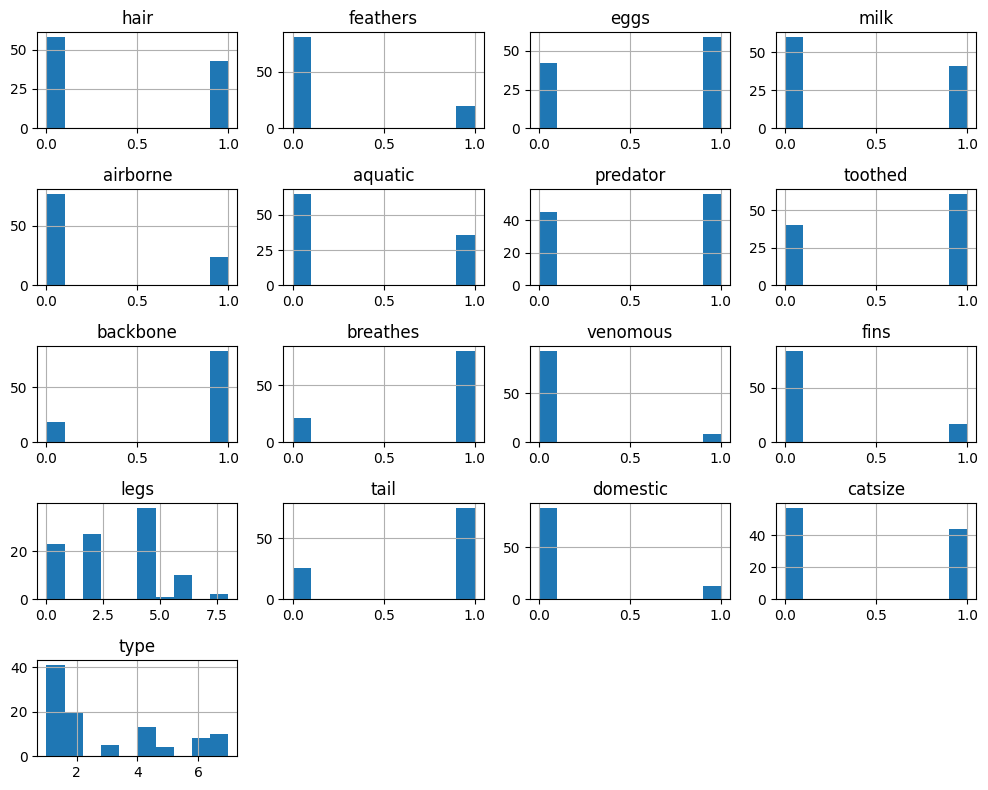

In [8]:
zoo.hist(figsize=(10, 8))
plt.tight_layout()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'hair'),
  Text(1, 0, 'feathers'),
  Text(2, 0, 'eggs'),
  Text(3, 0, 'milk'),
  Text(4, 0, 'airborne'),
  Text(5, 0, 'aquatic'),
  Text(6, 0, 'predator'),
  Text(7, 0, 'toothed'),
  Text(8, 0, 'backbone'),
  Text(9, 0, 'breathes'),
  Text(10, 0, 'venomous'),
  Text(11, 0, 'fins'),
  Text(12, 0, 'legs'),
  Text(13, 0, 'tail'),
  Text(14, 0, 'domestic'),
  Text(15, 0, 'catsize'),
  Text(16, 0, 'type')])

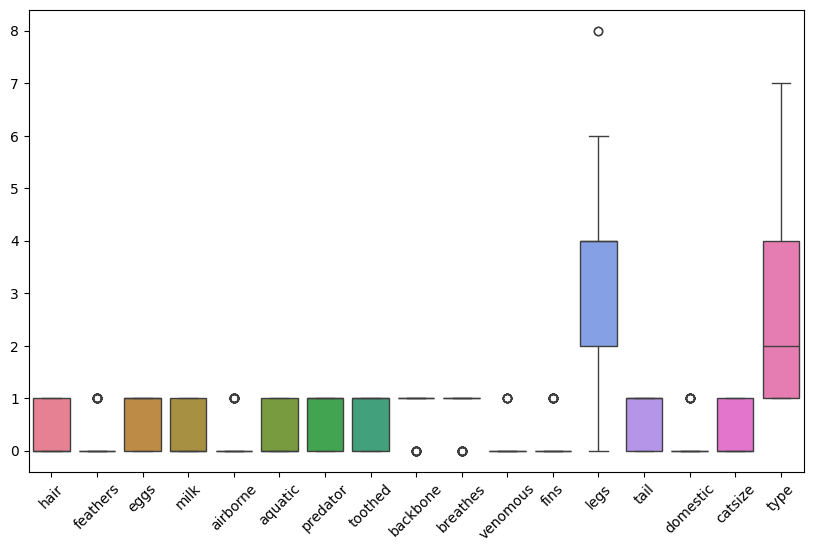

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=zoo)
plt.xticks(rotation=45)

<Axes: xlabel='type', ylabel='count'>

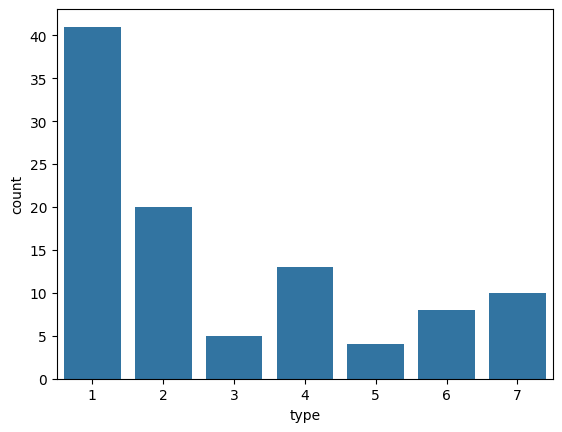

In [10]:
sns.countplot(x='type', data=zoo)

## Implement the K-Nearest Neighbours algorithm

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from mlxtend.plotting import plot_decision_regions

In [12]:
X = zoo.drop(['animal name','type'], axis=1)  # Features
y = zoo['type']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
82,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0
77,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0
86,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1
60,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
69,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
55,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1


In [13]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)
param_grid['metric']=['euclidean', 'manhattan','hamming']
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39]),
 'metric': ['euclidean', 'manhattan', 'hamming']}

In [14]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'hamming'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [15]:
print(grid.best_score_)
print(grid.best_params_)

0.9625
{'metric': 'euclidean', 'n_neighbors': 1}


Text(0, 0.5, 'Cross-Validated Accuracy')

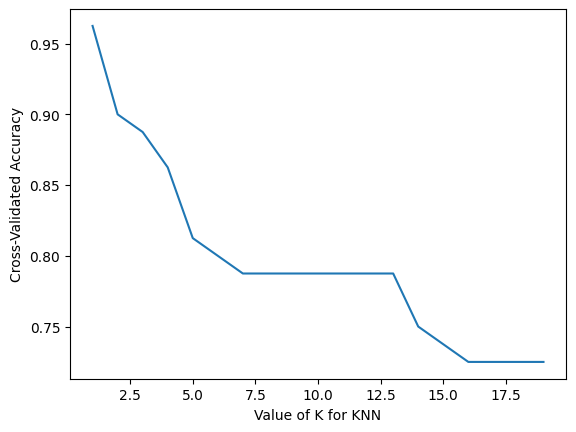

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 20
k_range = range(1, 20)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [17]:
knn=KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [18]:
y_pred = knn.predict(X_test)
y_pred

array([2, 1, 6, 2, 1, 6, 7, 1, 2, 1, 2, 4, 6, 5, 7, 2, 7, 1, 1, 1, 7])

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         4

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [20]:
accuracy_score(y_test, y_pred)

1.0

In [21]:
knn1=KNeighborsClassifier(n_neighbors=2, metric='euclidean')
knn1.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [22]:
y_pred1 = knn1.predict(X_test)
y_pred1

array([2, 1, 6, 2, 1, 6, 7, 1, 2, 1, 2, 4, 6, 5, 7, 2, 5, 1, 1, 1, 7])

In [23]:
accuracy_score(y_test, y_pred1)

0.9523809523809523

In [24]:
print(classification_report(y_test, y_pred1))    #model with n_neighbors=2

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         1
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         3
           7       1.00      0.75      0.86         4

    accuracy                           0.95        21
   macro avg       0.92      0.96      0.92        21
weighted avg       0.98      0.95      0.96        21



In [25]:
print(classification_report(y_test, y_pred))    #model with n_neighbors=1

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         4

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [44]:
y_np=y_train.values
y_np

array([1, 4, 7, 4, 4, 1, 2, 2, 1, 1, 1, 1, 3, 4, 2, 4, 5, 4, 6, 1, 1, 2,
       2, 1, 2, 2, 4, 1, 5, 1, 1, 1, 1, 1, 4, 7, 6, 1, 2, 1, 1, 3, 1, 2,
       1, 6, 6, 1, 4, 1, 1, 4, 6, 2, 1, 2, 7, 4, 3, 2, 3, 1, 1, 5, 4, 1,
       1, 1, 2, 3, 7, 2, 1, 1, 7, 2, 1, 1, 1, 7])

Text(0.5, 1.0, 'Decision Boundaries')

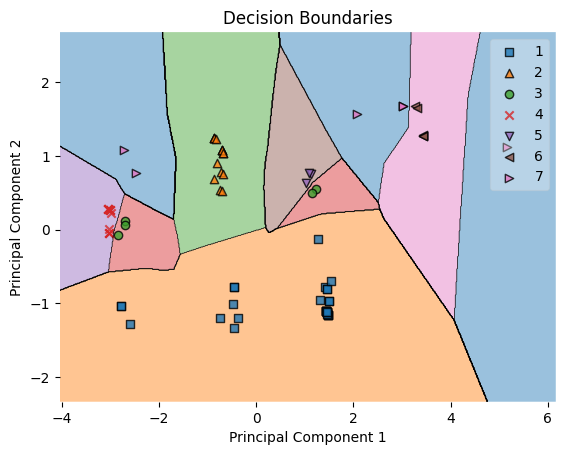

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
knn=KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(X_train_pca, y_np)
plot_decision_regions(X_train_pca, y_np, clf=knn)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundaries')

In [43]:
X_train_pca

array([[ 1.43067598, -1.10230968],
       [-3.00083869,  0.26329929],
       [-2.7234711 ,  1.08463023],
       [-3.02833477,  0.00653823],
       [-3.02052566, -0.03947482],
       [ 1.46588336, -1.12115456],
       [-0.74015436,  0.53965933],
       [-0.71997842,  0.7793777 ],
       [-2.77227129, -1.03987443],
       [ 1.48941549, -1.15879441],
       [ 1.27936676, -0.12614779],
       [-0.44439861, -0.77338254],
       [-2.83573321, -0.07926122],
       [-3.03604608,  0.28214417],
       [-0.85730541,  1.24516346],
       [-3.02052566, -0.03947482],
       [ 1.12765884,  0.75464309],
       [-2.97730657,  0.22565943],
       [ 3.43995424,  1.28174104],
       [ 1.48941549, -1.15879441],
       [-2.58366993, -1.28319816],
       [-0.67675933,  1.04451195],
       [-0.70029145,  1.08215181],
       [ 1.46588336, -1.12115456],
       [-0.85730541,  1.24516346],
       [-0.68477103,  0.76053282],
       [-3.03604608,  0.28214417],
       [-0.44439861, -0.77338254],
       [ 1.09245146,

### **Interview Questions:**

**What are the key hyperparameters in KNN?**

**Number of Neighbors (K):**  
This is the most critical hyperparameter in KNN. It determines how many nearest neighbors to consider when making a prediction for a new data point. Choosing an appropriate value for K is important because too small a value may lead to noise sensitivity, while too large a value may result in oversmoothing.

**Distance Metric:**  
The distance metric determines how distances between data points are calculated. Common distance metrics include Euclidean distance, Manhattan distance, Minkowski distance, etc. The choice of distance metric can significantly impact the performance of KNN, especially when dealing with data of different scales or dimensions.

**Weighting Scheme:**   
KNN can use a uniform weighting scheme where all neighbors contribute equally to the prediction, or a distance-based weighting scheme where closer neighbors have more influence on the prediction. The choice between these weighting schemes can affect the algorithm's sensitivity to outliers and the shape of decision boundaries.


**Algorithm for Nearest Neighbors Search:**   
For large datasets, efficiently finding the nearest neighbors can be computationally expensive. Different algorithms, such as brute force, KD tree, or ball tree, can be used to speed up this process. The choice of algorithm depends on the dataset size, dimensionality, and sparsity.

**Preprocessing Techniques:**   
Preprocessing techniques such as feature scaling (e.g., standardization, normalization) can influence the performance of KNN. Since KNN relies on distance calculations, features with larger scales may dominate the distance calculations, so it's often beneficial to scale features to the same range.

**Kernel Function (for kernelized KNN):**
In kernelized KNN, a kernel function is applied to the distances between data points to transform them into similarity measures. The choice of kernel function, such as linear, polynomial, Gaussian (RBF), etc., can impact the flexibility and generalization of the model.


<br>

**What distance metrics can be used in KNN?**

**Euclidean Distance:**
Measures the straight-line distance between two points in Euclidean space.

**Manhattan Distance (City Block Distance):**
Measures the distance between two points by summing the absolute differences of their coordinates.

**Chebyshev Distance (Maximum Value Distance):**
Measures the distance between two points by taking the maximum absolute difference between their coordinates along any dimension.

**Minkowski Distance:**
A generalization of both Euclidean and Manhattan distances. The parameter
p determines the degree of the Minkowski distance.

**Cosine Similarity:**
Measures the cosine of the angle between two vectors. Often used for text data or high-dimensional data.

**Hamming Distance (for binary data):**
Measures the number of positions at which the corresponding symbols in two binary strings differ. Commonly used for categorical or binary data.